# **Super Store Dataset**
#Importing Laibraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

#Reading the dataset


In [ ]:
df = pd.read_csv('/content/train.csv',index_col=0)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head(10)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,,,,,
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
6,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600
7,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800
8,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520
9,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040


##Data Cleaning

How big is the dataset

In [ ]:
df.shape
print('The number of rows is {} and number columns in the dataframe is {}'.format(df.shape[0],df.shape[1]))

The number of rows is 9800 and number columns in the dataframe is 17


Is column names are cleand and descriptive?

In [ ]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales'],
      dtype='object')

In [ ]:
#Some columns titles have white spaces and hipens. so we will remove this and make coulmns names clean and consistant
df.columns = ['OrderID','OrderDate', 'ShipDate', 'ShipMode', 'CustomerID', 'CustomerName', 'Segment' ,
                         'Country', 'City', 'State', 'PostalCode', 'Region', 'ProductID', 'Category', 'SubCategory',
                         'ProductName' , 'Sales',]

In [ ]:
#Country column will be removed since it is same for all the rows
df.drop(['Country'], inplace =True, axis=1)

General information about the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9800 entries, 1 to 9800
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OrderID       9800 non-null   object 
 1   OrderDate     9800 non-null   object 
 2   ShipDate      9800 non-null   object 
 3   ShipMode      9800 non-null   object 
 4   CustomerID    9800 non-null   object 
 5   CustomerName  9800 non-null   object 
 6   Segment       9800 non-null   object 
 7   City          9800 non-null   object 
 8   State         9800 non-null   object 
 9   PostalCode    9789 non-null   float64
 10  Region        9800 non-null   object 
 11  ProductID     9800 non-null   object 
 12  Category      9800 non-null   object 
 13  SubCategory   9800 non-null   object 
 14  ProductName   9800 non-null   object 
 15  Sales         9800 non-null   float64
dtypes: float64(2), object(14)
memory usage: 1.3+ MB


We can see there are no null values in the dataset




In [ ]:
#Changing the data type of some columns from object type to categorical type
df['ShipMode'] = df['ShipMode'].astype('category')    # Changing to datatype to category
df['ShipMode'].dtype

CategoricalDtype(categories=['First Class', 'Same Day', 'Second Class', 'Standard Class'], ordered=False)

In [ ]:
df['SubCategory'] = df['SubCategory'].astype('category')   #change dataype of SubCategory Column
df['SubCategory']

Row ID
1         Bookcases
2            Chairs
3            Labels
4            Tables
5           Storage
6       Furnishings
7               Art
8            Phones
9           Binders
10       Appliances
11           Tables
12           Phones
13            Paper
14          Binders
15       Appliances
16          Binders
17          Storage
18          Storage
19              Art
20           Phones
21          Binders
22              Art
23       Appliances
24           Chairs
25           Tables
26          Binders
27      Accessories
28        Bookcases
29          Binders
30      Furnishings
31        Envelopes
32              Art
33          Binders
34              Art
35            Paper
36           Phones
37      Furnishings
38        Envelopes
39        Bookcases
40           Chairs
41           Phones
42           Phones
43          Storage
44          Storage
45      Accessories
46          Binders
47          Storage
48      Accessories
49           Phones
50          B

In [ ]:
df['Category'] = df['Category'].astype('category')  #change datatype of Category column to category datatype
df['Category']

Row ID
1             Furniture
2             Furniture
3       Office Supplies
4             Furniture
5       Office Supplies
6             Furniture
7       Office Supplies
8            Technology
9       Office Supplies
10      Office Supplies
11            Furniture
12           Technology
13      Office Supplies
14      Office Supplies
15      Office Supplies
16      Office Supplies
17      Office Supplies
18      Office Supplies
19      Office Supplies
20           Technology
21      Office Supplies
22      Office Supplies
23      Office Supplies
24            Furniture
25            Furniture
26      Office Supplies
27           Technology
28            Furniture
29      Office Supplies
30            Furniture
31      Office Supplies
32      Office Supplies
33      Office Supplies
34      Office Supplies
35      Office Supplies
36           Technology
37            Furniture
38      Office Supplies
39            Furniture
40            Furniture
41           Technology
42       

In [ ]:
df['Segment'] = df['Segment'].astype('category')  #changing the datatype of the segment column from object to category dtype
df['Segment'].dtype

CategoricalDtype(categories=['Consumer', 'Corporate', 'Home Office'], ordered=False)

Lets check for the duplicate/repeated values

In [ ]:
duplicates = df.duplicated(keep = False)
duplicates.sum()

2

In [ ]:
# Sorting the duplicated sales to see duplicated values
duplicated_sales = df[duplicates].sort_values('Row ID')
duplicated_sales

,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,City,State,PostalCode,Region,ProductID,Category,SubCategory,ProductName,Sales
Row ID,,,,,,,,,,,,,,,,
3406,US-2015-150119,23/04/2015,27/04/2015,Standard Class,LB-16795,Laurel Beltran,Home Office,Columbus,Ohio,43229.0,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372
3407,US-2015-150119,23/04/2015,27/04/2015,Standard Class,LB-16795,Laurel Beltran,Home Office,Columbus,Ohio,43229.0,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372


In [ ]:
df.drop_duplicates(keep = 'first',ignore_index = True,inplace=True)
df.duplicated(keep = False).unique() #code to confirm that the found duplicates have been dropped
df.duplicated().sum() #code to confirm that the duplcates have been dropped

0

In [ ]:
df.shape #Confrmation of dropped duplicates through the checking of total number of rows have reduced by 1

(9799, 16)

In [ ]:
df.describe()

,PostalCode,Sales
count,9788.000000,9799.000000
mean,55274.552922,230.763895
std,32042.628986,626.683644
min,1040.000000,0.444000
25%,23223.000000,17.248000
50%,58103.000000,54.480000
75%,90008.000000,210.572000
max,99301.000000,22638.480000


In [ ]:
#Summary of statics of non numerical columns
df.describe(include = np.object)

,OrderID,OrderDate,ShipDate,CustomerID,CustomerName,City,State,Region,ProductID,ProductName
count,9799,9799,9799,9799,9799,9799,9799,9799,9799,9799
unique,4922,1230,1326,793,793,529,49,4,1861,1849
top,CA-2018-100111,05/09/2017,26/09/2018,WB-21850,William Brown,New York City,California,West,OFF-PA-10001970,Staple envelope
freq,14,38,34,35,35,891,1946,3140,19,47


Adding two new columns 'OrderMonth' and 'OrderYear'

In [ ]:
# Convert the "OrderDate" column to datetime format
df['OrderDate'] = pd.to_datetime(df['OrderDate'], format='%d/%m/%Y')

# Create a new column "OrderMonth" with the month extracted from "OrderDate"
df['OrderMonth'] = df['OrderDate'].dt.month

In [ ]:
df.head(5)

,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,City,State,PostalCode,Region,ProductID,Category,SubCategory,ProductName,Sales,OrderMonth
0,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,11
1,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,11
2,CA-2017-138688,2017-06-12,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,6
3,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,10
4,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,10


In [ ]:
# Create a new column "OrderYear" with the year extracted from "OrderDate"
df['OrderYear'] = df['OrderDate'].dt.year
df.head(5)

,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,City,State,PostalCode,Region,ProductID,Category,SubCategory,ProductName,Sales,OrderMonth,OrderYear
0,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,11,2017
1,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,11,2017
2,CA-2017-138688,2017-06-12,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,6,2017
3,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,10,2016
4,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,10,2016


In [ ]:
df.columns

Index(['OrderID', 'OrderDate', 'ShipDate', 'ShipMode', 'CustomerID',
       'CustomerName', 'Segment', 'City', 'State', 'PostalCode', 'Region',
       'ProductID', 'Category', 'SubCategory', 'ProductName', 'Sales',
       'OrderMonth', 'OrderYear'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9799 entries, 0 to 9798
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   OrderID       9799 non-null   object        
 1   OrderDate     9799 non-null   datetime64[ns]
 2   ShipDate      9799 non-null   object        
 3   ShipMode      9799 non-null   category      
 4   CustomerID    9799 non-null   object        
 5   CustomerName  9799 non-null   object        
 6   Segment       9799 non-null   category      
 7   City          9799 non-null   object        
 8   State         9799 non-null   object        
 9   PostalCode    9788 non-null   float64       
 10  Region        9799 non-null   object        
 11  ProductID     9799 non-null   object        
 12  Category      9799 non-null   category      
 13  SubCategory   9799 non-null   category      
 14  ProductName   9799 non-null   object        
 15  Sales         9799 non-null   float64 

 # **EXPLORATORY DATA ANALYSIS**

1.Histogram to visualize the distribution of key numeric variables.

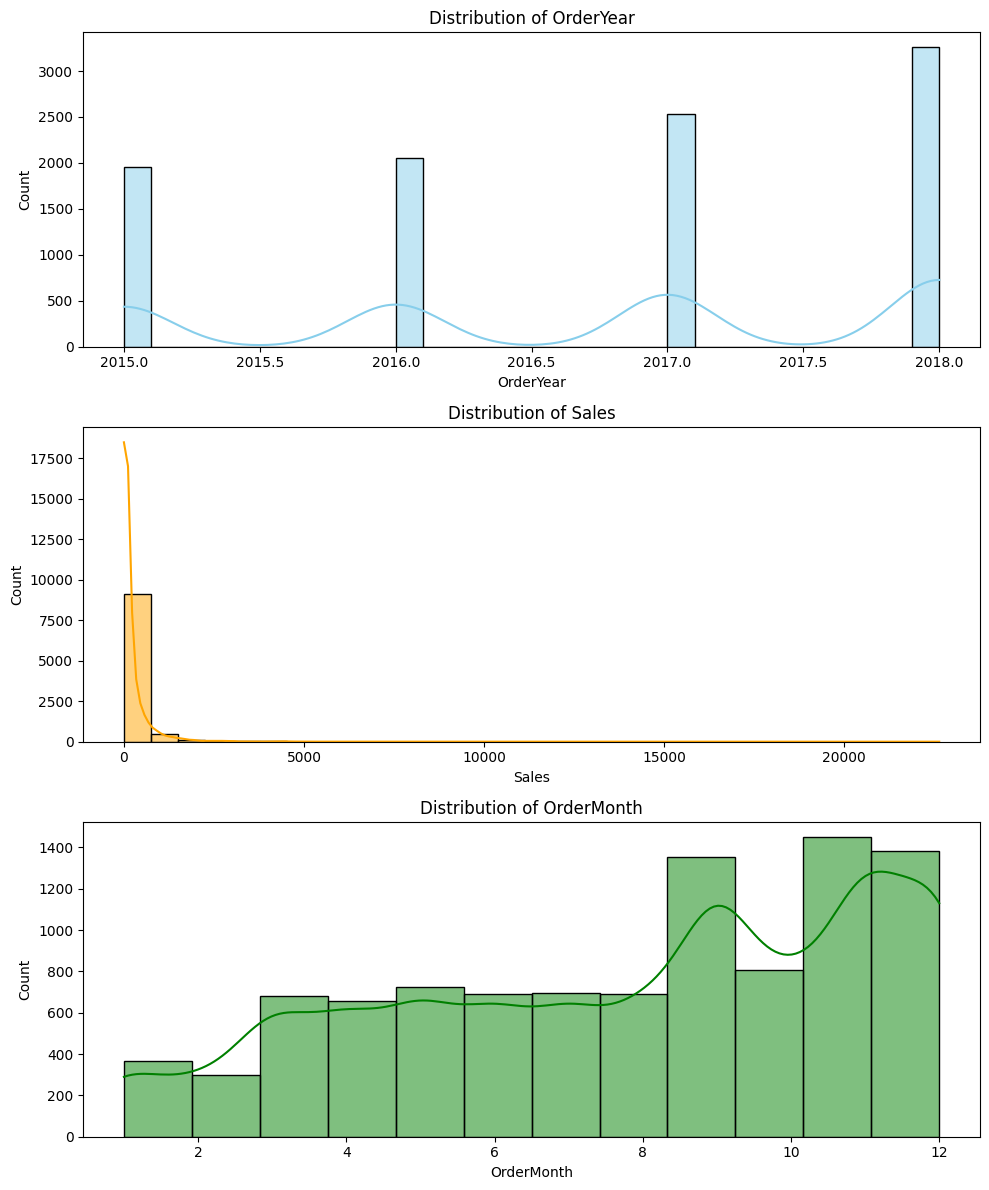

In [ ]:
# Set up the matplotlib figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

# Create histograms for numeric variables
sns.histplot(df['OrderYear'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of OrderYear')

sns.histplot(df['Sales'], bins=30, kde=True, ax=axes[1], color='orange')
axes[1].set_title('Distribution of Sales')

sns.histplot(df['OrderMonth'], bins=12, kde=True, ax=axes[2], color='green')
axes[2].set_title('Distribution of OrderMonth')

# Adjust layout
plt.tight_layout()
plt.show()

#Insights


1.   Sales has been increasing year by year.
2.   There is increase in sales at the year end .



2.Time series graphs to understand the trends and patterns in sales over the 4-year period.

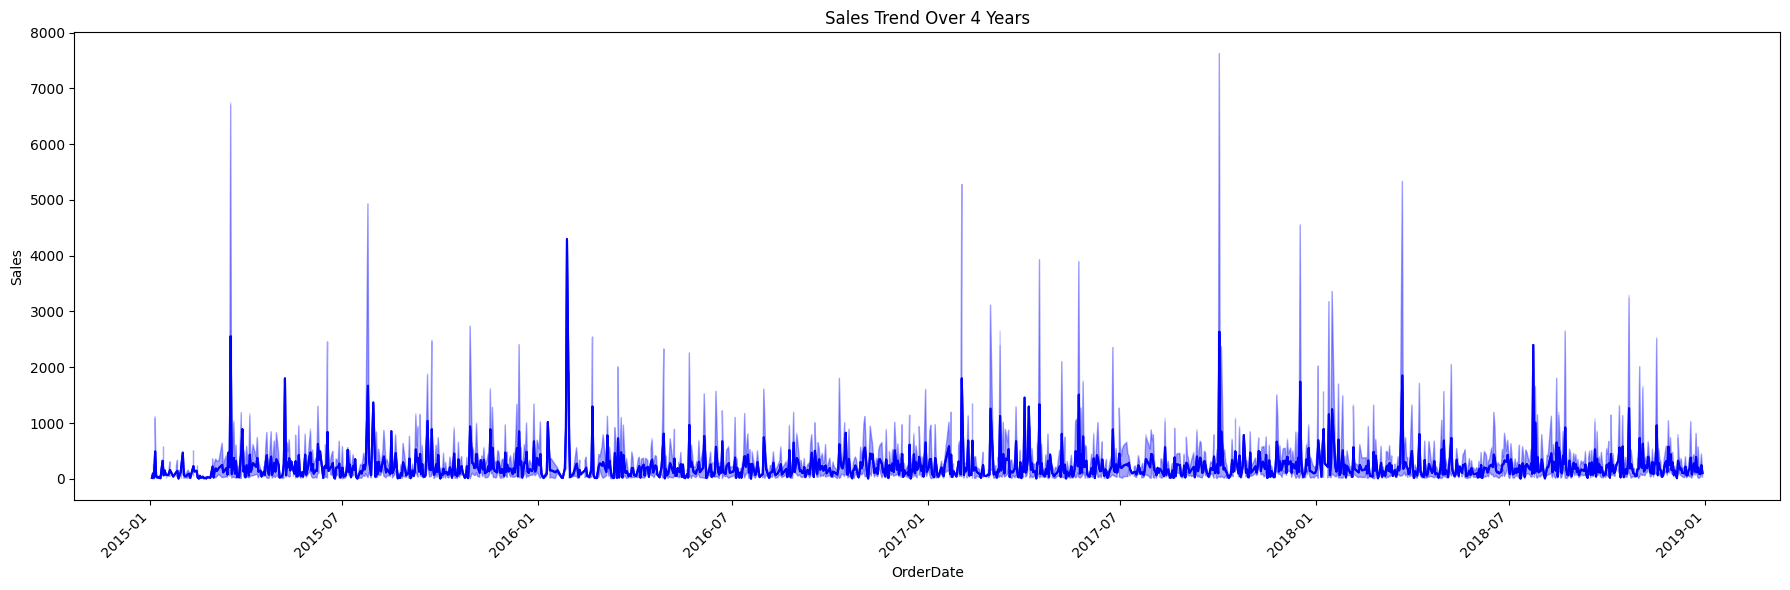

In [ ]:
# Plot time series graph
plt.figure(figsize=(18, 6))
sns.lineplot(x='OrderDate', y='Sales', data=df, color='blue')
sns.lineplot(x='OrderDate', y='Sales', data=df, color='blue')
plt.title('Sales Trend Over 4 Years')
plt.xlabel('OrderDate')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()



3. Box plots to identify outliers and understand the distribution of numeric variables.

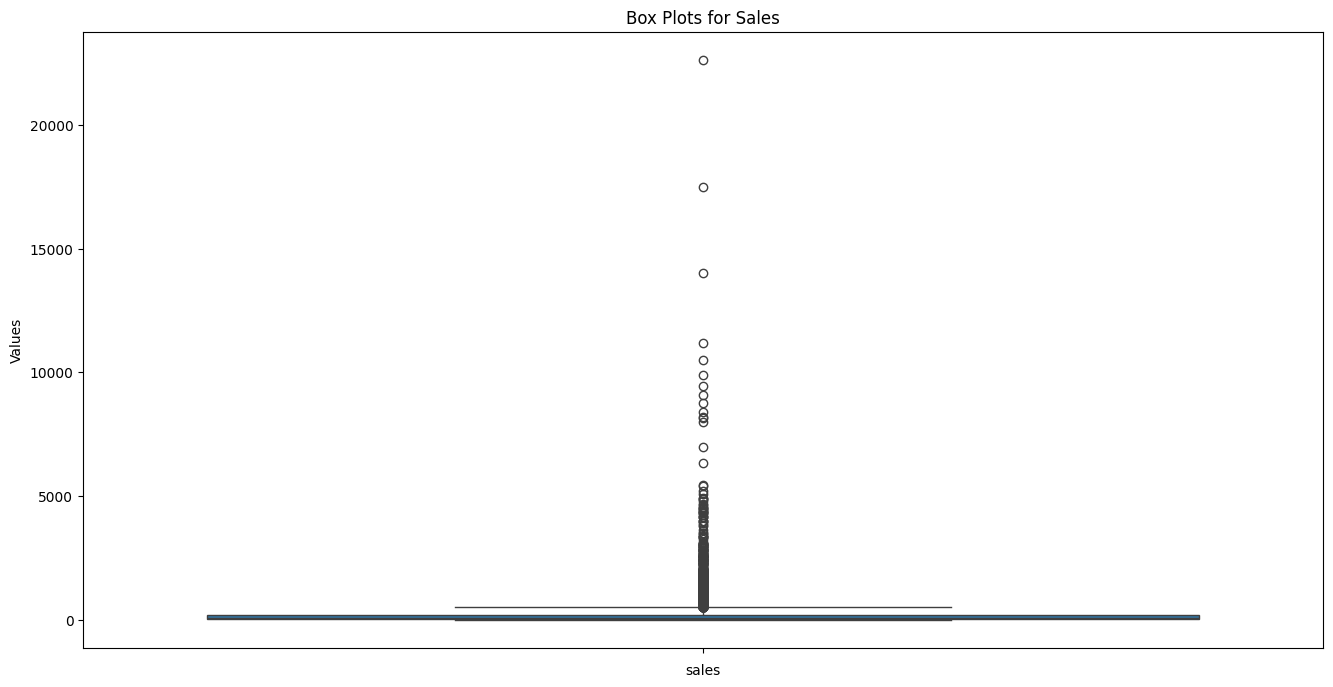

In [ ]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=df['Sales'])
plt.title('Box Plots for Sales')
plt.xlabel('sales')
plt.ylabel('Values')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

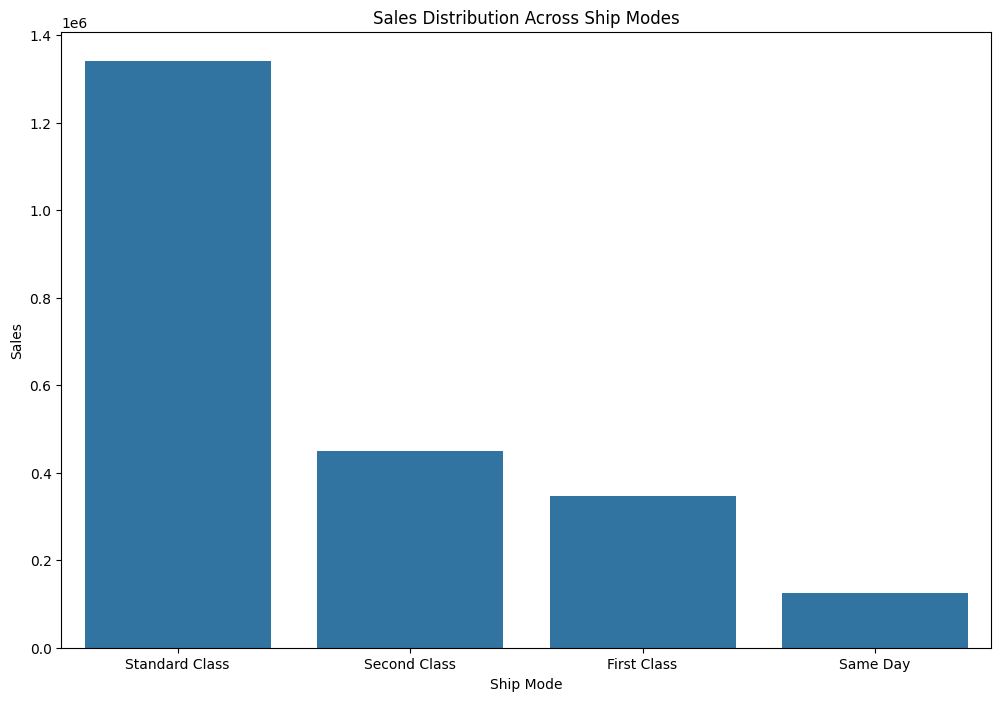

In [ ]:
# Select the 'ShipMode' and 'Sales' columns
shipmode_sales = df[['ShipMode', 'Sales']]

# Group by 'ShipMode' and sum the sales
sales_by_shipmode = shipmode_sales.groupby('ShipMode')['Sales'].sum().reset_index()

# Create a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='ShipMode', y='Sales', data=sales_by_shipmode, order=sales_by_shipmode.sort_values('Sales', ascending=False)['ShipMode'])
plt.title('Sales Distribution Across Ship Modes')
plt.xlabel('Ship Mode')
plt.ylabel('Sales')
plt.show()

#Insights


1.   Standard class is the most prefered ship mode, followed by second class.
2.   Same day shipping mode has least sales.



#Segment vs sales

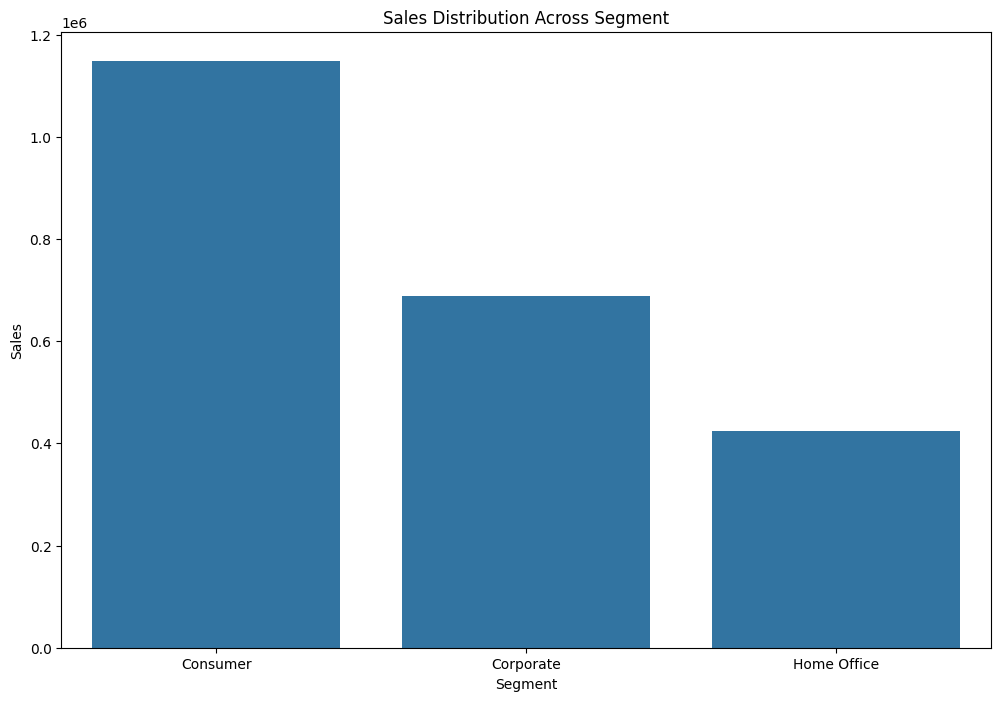

In [ ]:
# Select the 'Segment' and 'Sales' columns
shipmode_sales = df[['Segment', 'Sales']]

# Group by 'ShipMode' and sum the sales
sales_by_shipmode = shipmode_sales.groupby('Segment')['Sales'].sum().reset_index()

# Create a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Segment', y='Sales', data=sales_by_shipmode, order=sales_by_shipmode.sort_values('Sales', ascending=False)['Segment'])
plt.title('Sales Distribution Across Segment')
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.show()

#Insights


1.   Consumer segment has highest sales followed by corporate and home office.




#Category vs Sales

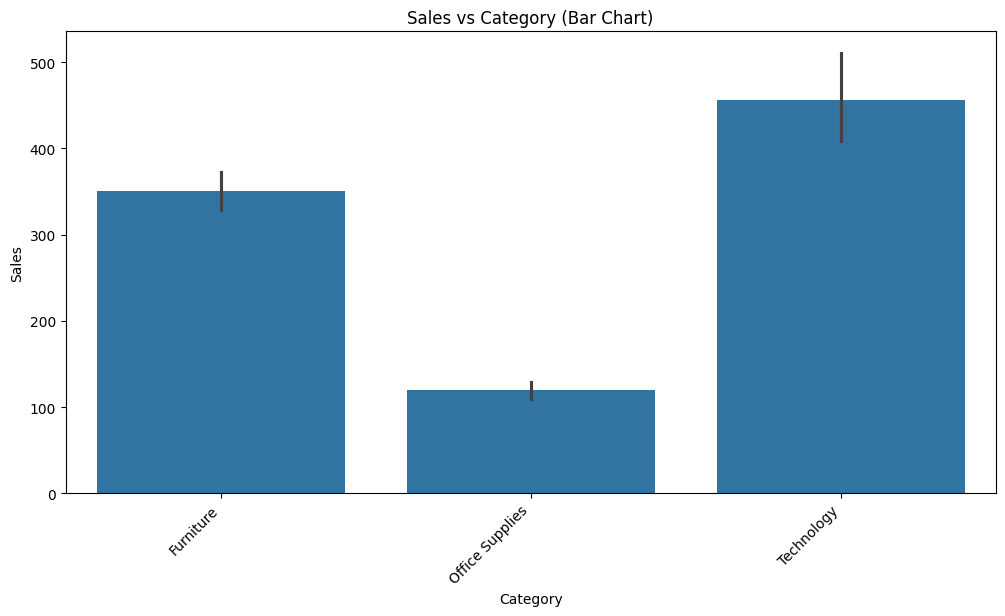

In [ ]:
# Select 'Category' and 'Sales' columns
category_column = 'Category'
sales_column = 'Sales'

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=category_column, y=sales_column, data=df)
plt.title('Sales vs Category (Bar Chart)')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

#Sub Category vs Sales

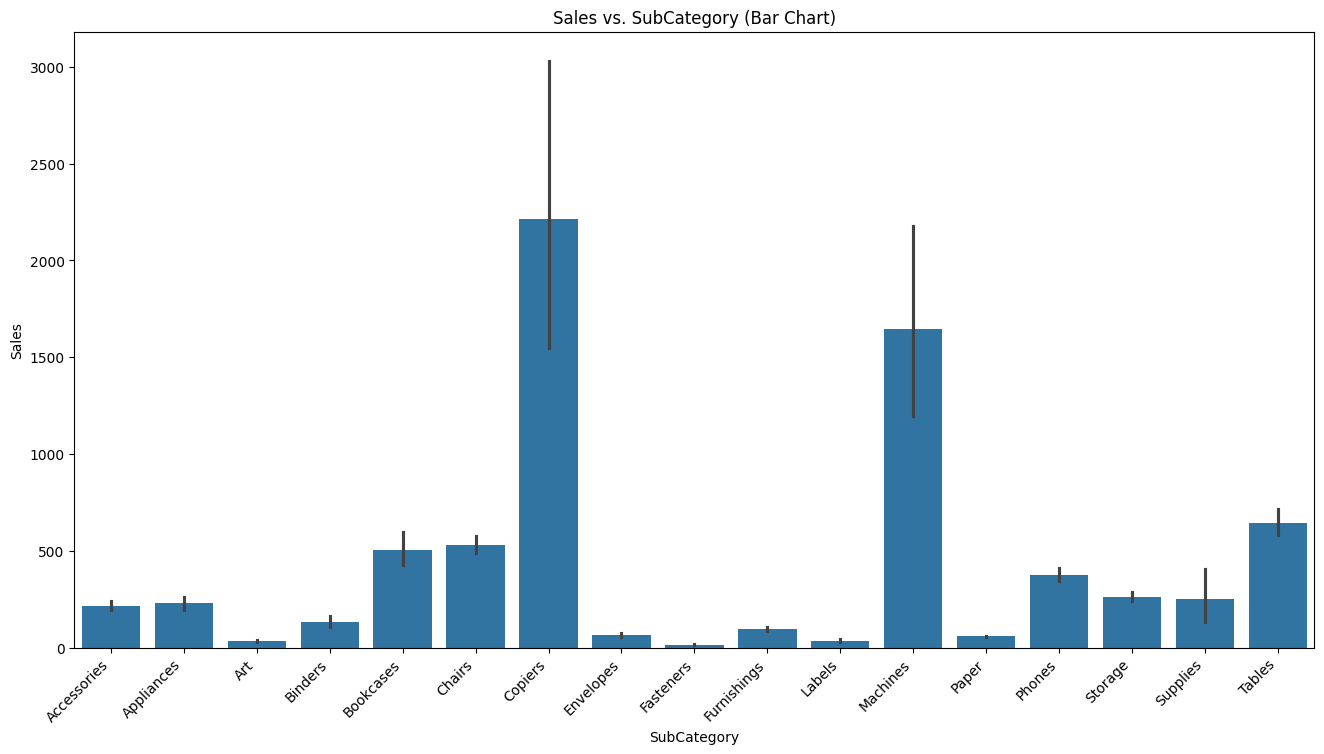

In [ ]:
# Select the specific category and numeric column
category_column = 'SubCategory'
numeric_column = 'Sales'

# Create a bar chart
plt.figure(figsize=(16, 8))
sns.barplot(x=category_column, y=numeric_column, data=df)
plt.title(f'{numeric_column} vs. {category_column} (Bar Chart)')
plt.xlabel(category_column)
plt.ylabel(numeric_column)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

#Insights


1.   Copiers and Machines tops in sales.
2.   Fasteners,Art and labels have very least sales.



#Correlation plot

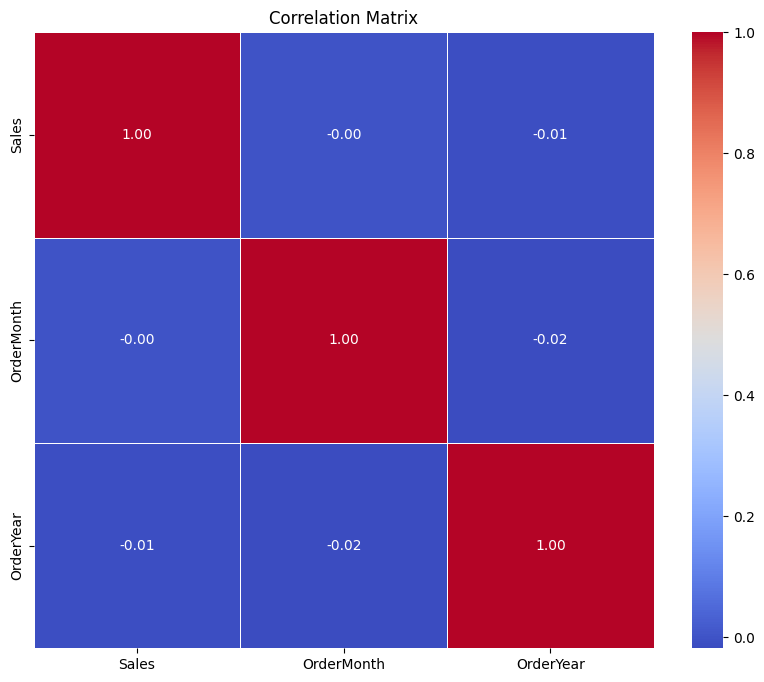

In [ ]:
# Select the relevant columns for correlation analysis
numeric_columns = ['Sales', 'OrderMonth', 'OrderYear']

# Create a subset DataFrame with only the selected columns
subset_df = df[numeric_columns]

# Plot the correlation matrix using a heatmap
correlation_matrix = subset_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

#Scatter plot for numerical columns

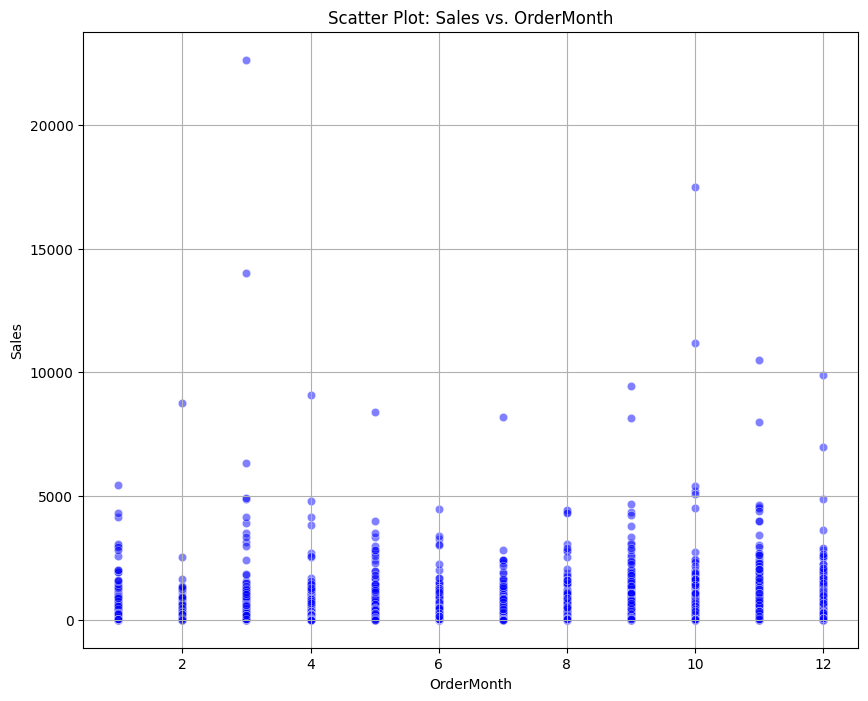

In [ ]:
# Select the specific columns for scatter plot
numeric_column_x = 'OrderMonth'
numeric_column_y = 'Sales'

# Plot a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df[numeric_column_x], y=df[numeric_column_y], color='blue', alpha=0.5)
plt.title(f'Scatter Plot: {numeric_column_y} vs. {numeric_column_x}')
plt.xlabel(numeric_column_x)
plt.ylabel(numeric_column_y)
plt.grid(True)
plt.show()

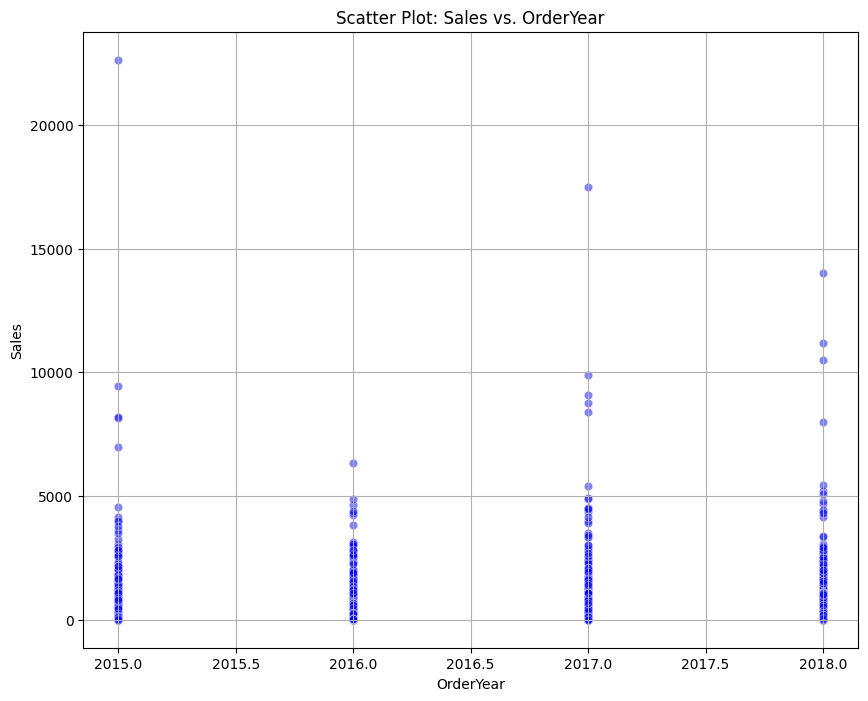

In [ ]:
# Select the specific columns for scatter plot
numeric_column_x = 'OrderYear'
numeric_column_y = 'Sales'

# Plot a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df[numeric_column_x], y=df[numeric_column_y], color='blue', alpha=0.5)
plt.title(f'Scatter Plot: {numeric_column_y} vs. {numeric_column_x}')
plt.xlabel(numeric_column_x)
plt.ylabel(numeric_column_y)
plt.grid(True)
plt.show()

#Line charts for different category


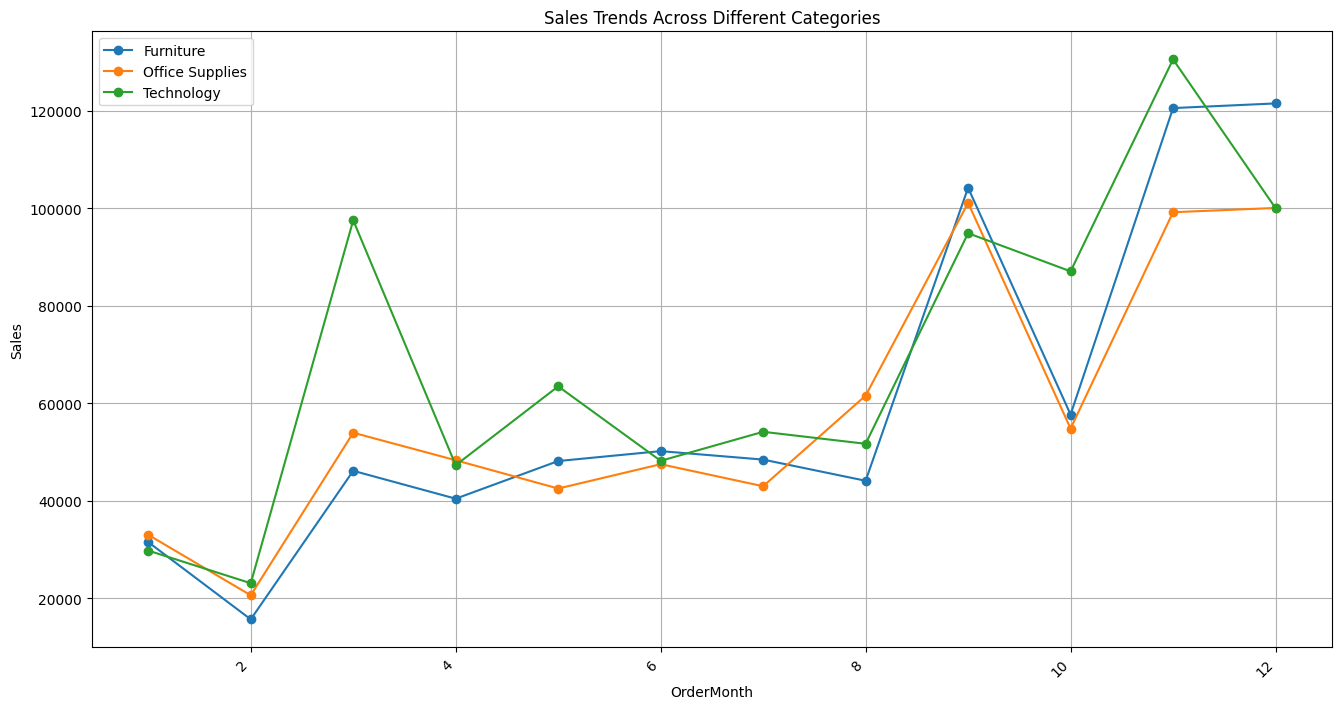

In [ ]:
# Select the specific columns for analysis
category_column = 'Category'
date_column = 'OrderMonth'
numeric_column = 'Sales'

# Get unique categories in the dataset
unique_categories = df[category_column].unique()

# Plot line charts for each category
plt.figure(figsize=(16, 8))
for category in unique_categories:
    category_data = df[df[category_column] == category]
    sales_by_month = category_data.groupby(date_column)[numeric_column].sum()

    plt.plot(sales_by_month.index, sales_by_month.values, label=category, marker='o', linestyle='-')

plt.title(f'Sales Trends Across Different Categories')
plt.xlabel(date_column)
plt.ylabel(numeric_column)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.show()

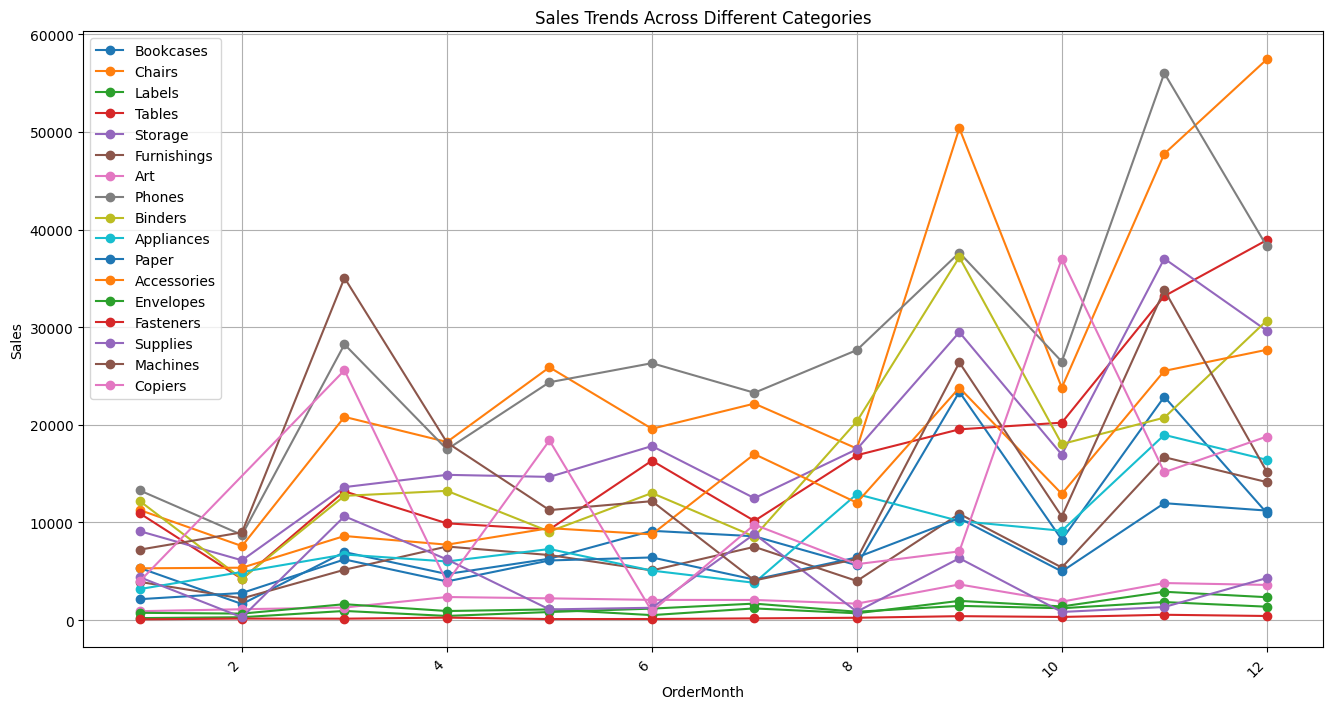

In [ ]:
# Select the specific columns for analysis
category_column = 'SubCategory'
date_column = 'OrderMonth'
numeric_column = 'Sales'

# Get unique categories in the dataset
unique_categories = df[category_column].unique()

# Plot line charts for each category
plt.figure(figsize=(16, 8))
for category in unique_categories:
    category_data = df[df[category_column] == category]
    sales_by_month = category_data.groupby(date_column)[numeric_column].sum()

    plt.plot(sales_by_month.index, sales_by_month.values, label=category, marker='o', linestyle='-')

plt.title(f'Sales Trends Across Different SubCategories')
plt.xlabel(date_column)
plt.ylabel(numeric_column)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.show()

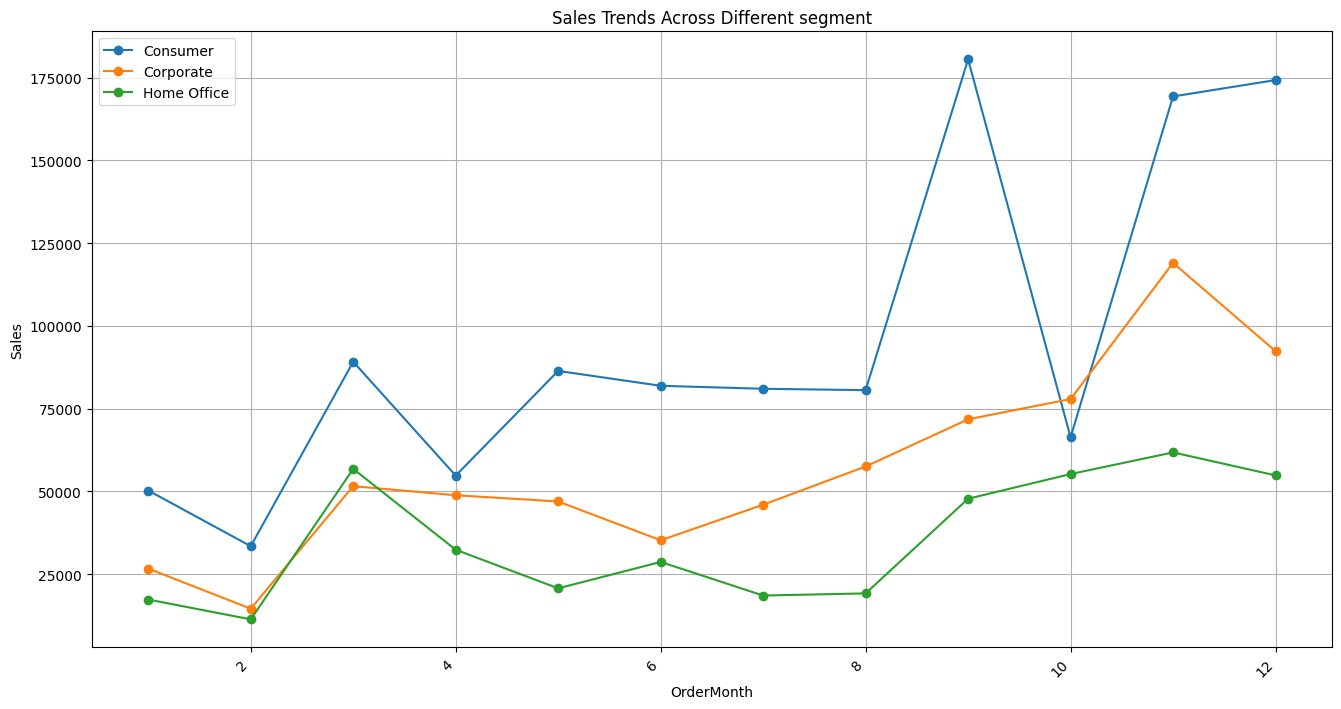

In [ ]:
# Select the specific columns for analysis
category_column = 'Segment'
date_column = 'OrderMonth'
numeric_column = 'Sales'

# Get unique categories in the dataset
unique_categories = df[category_column].unique()

# Plot line charts for each category
plt.figure(figsize=(16, 8))
for category in unique_categories:
    category_data = df[df[category_column] == category]
    sales_by_month = category_data.groupby(date_column)[numeric_column].sum()

    plt.plot(sales_by_month.index, sales_by_month.values, label=category, marker='o', linestyle='-')

plt.title(f'Sales Trends Across Different segment')
plt.xlabel(date_column)
plt.ylabel(numeric_column)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.show()

Shipping mode vs sales

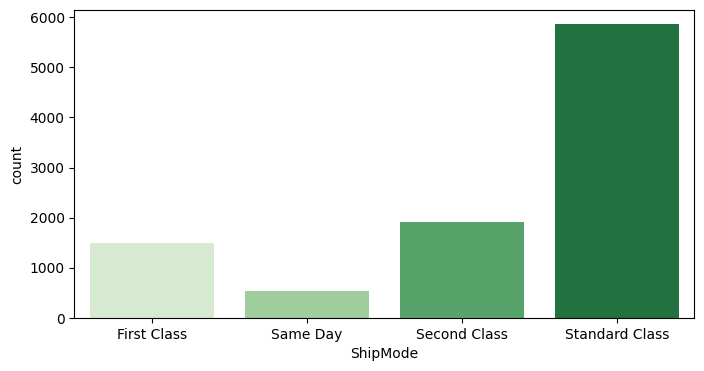

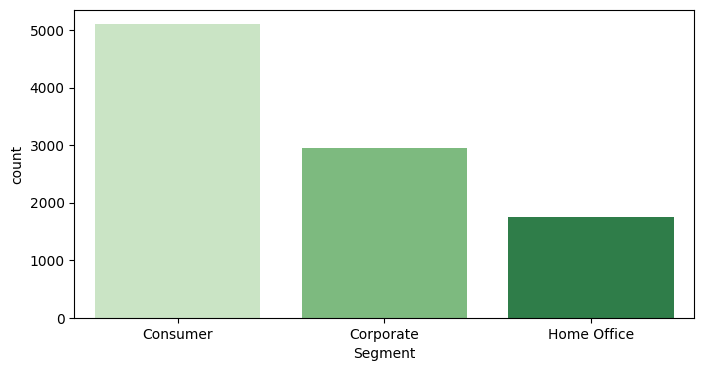

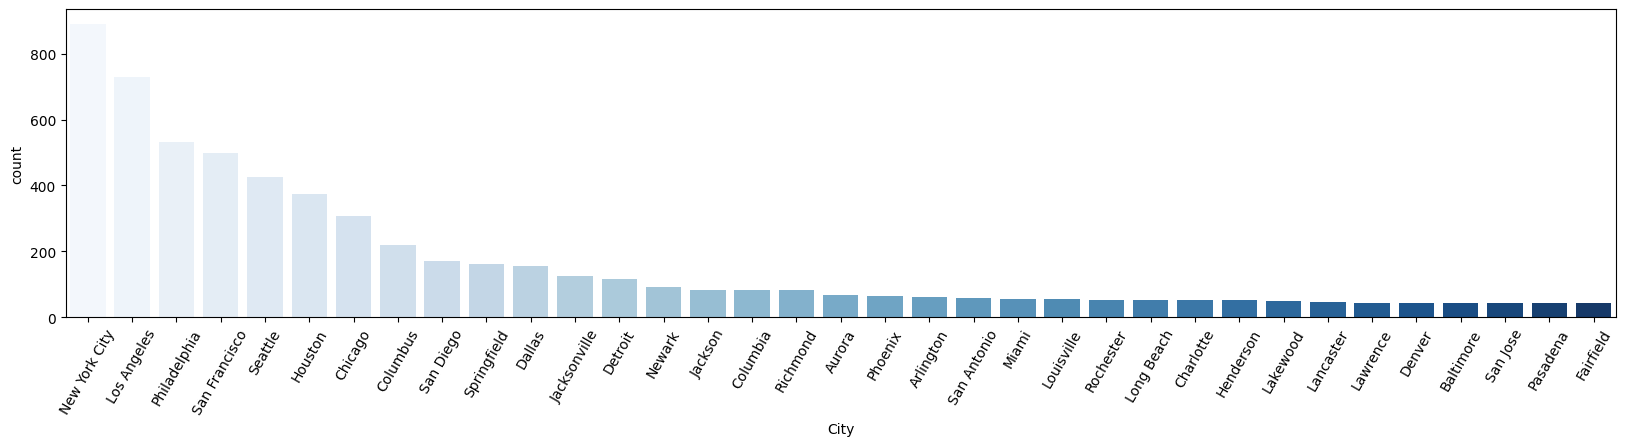

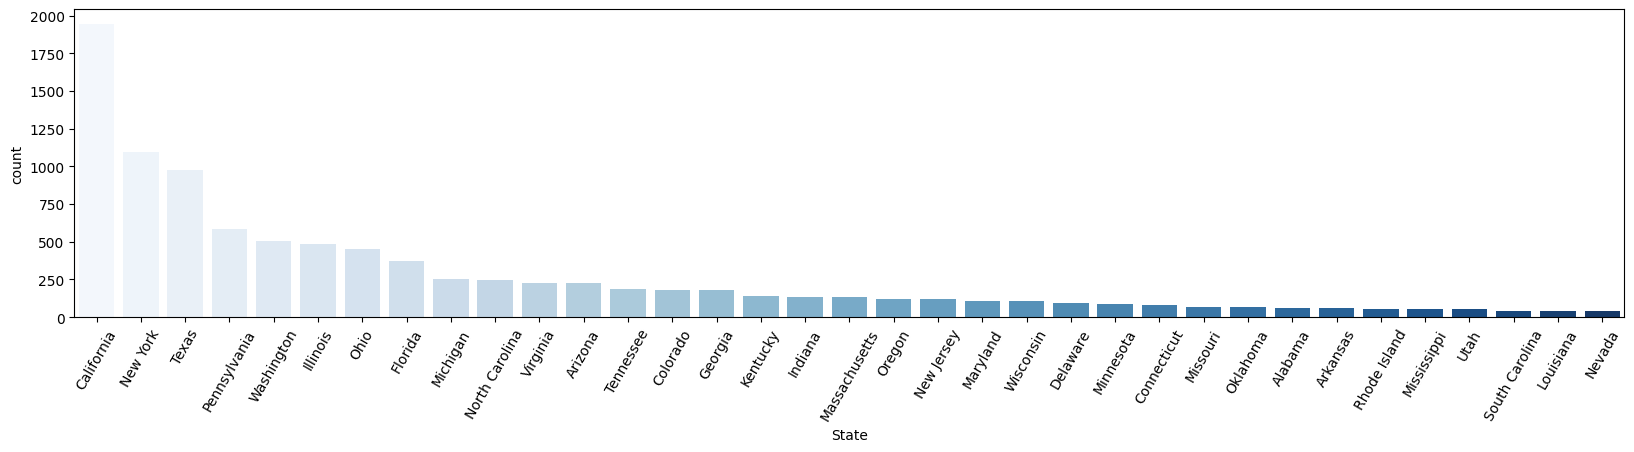

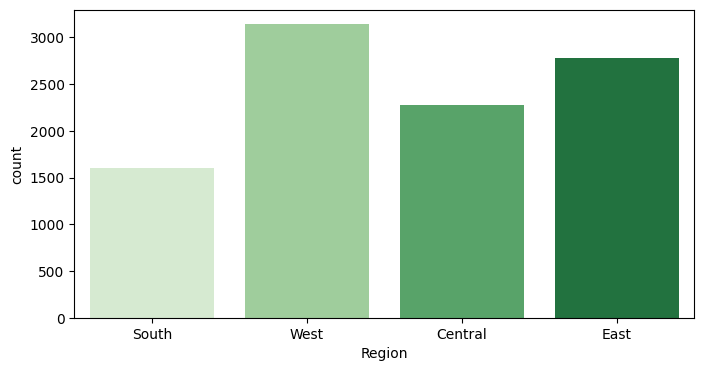

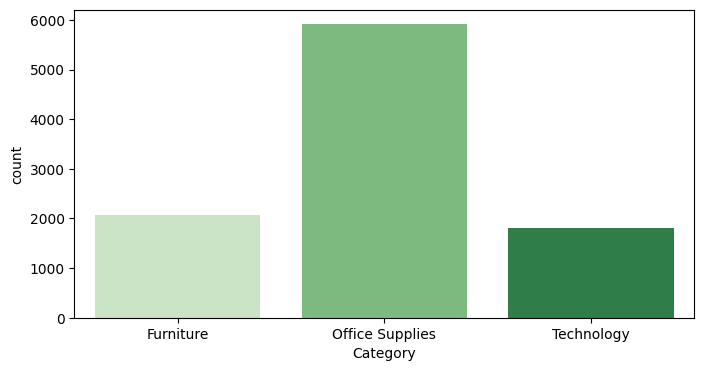

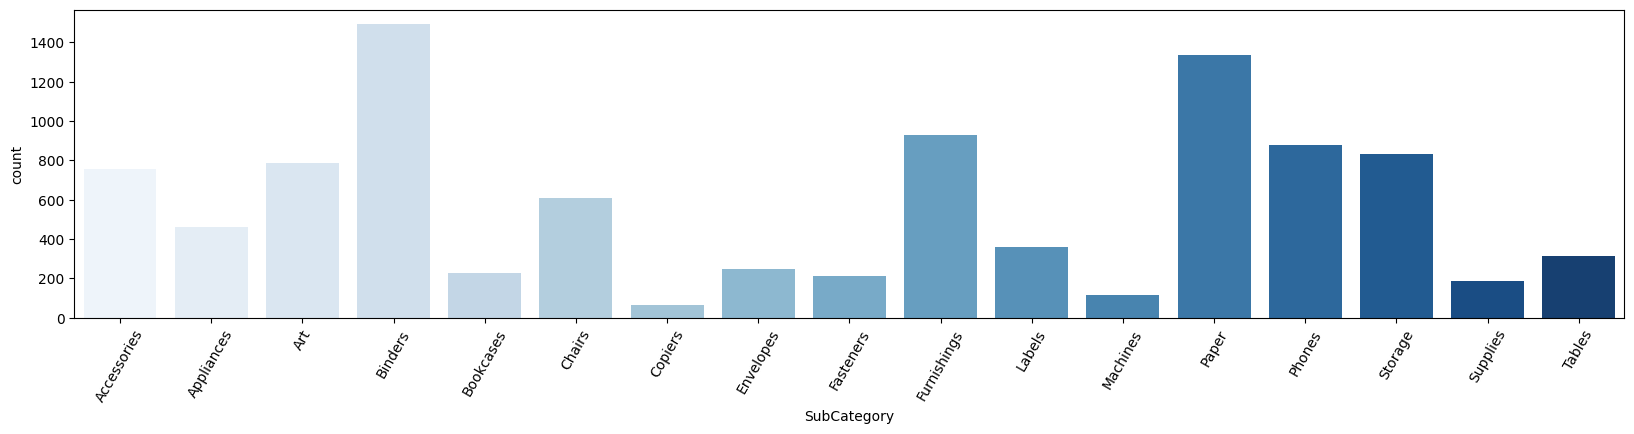

In [ ]:
imp_categotical_features=df[['ShipMode','Segment', 'City', 'State','Region','Category', 'SubCategory']]

for col in imp_categotical_features:
    width=8
    n=len(df[col].unique())
    if n > 15:
        width=20
        plt.figure(figsize=(width,4))
        temp=pd.DataFrame(df[col].value_counts().sort_values(ascending=False)[:35],columns=[col])
        sns.barplot(data=temp,x=temp.index,y=col,palette= 'Blues')
        plt.ylabel("count")
        plt.xlabel(col)
        plt.xticks(rotation=60)
    else:
        plt.figure(figsize=(width,4))
        sns.countplot(data=df,x=col,palette='Greens')
    plt.show()